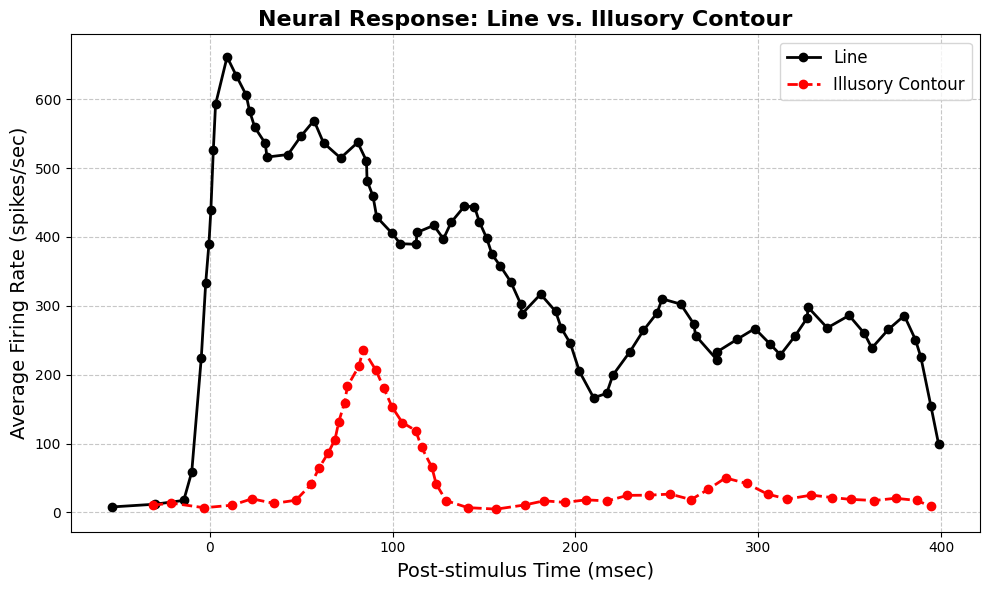

In [10]:
import json
import matplotlib.pyplot as plt

def plot_neural_responses(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)

    # Extract datasets
    line_data = next(d for d in data['datasetColl'] if d['name'] == 'line')['data']
    illusory_data = next(d for d in data['datasetColl'] if d['name'] == 'illusory contour')['data']

    # Sort data points by x-axis (time)
    line_data_sorted = sorted(line_data, key=lambda p: p['value'][0])
    illusory_data_sorted = sorted(illusory_data, key=lambda p: p['value'][0])

    line_x = [point['value'][0] for point in line_data_sorted]
    line_y = [point['value'][1] for point in line_data_sorted]
    illusory_x = [point['value'][0] for point in illusory_data_sorted]
    illusory_y = [point['value'][1] for point in illusory_data_sorted]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(line_x, line_y, label='Line', color='black', marker='o', linewidth=2, markersize=6)
    plt.plot(illusory_x, illusory_y, label='Illusory Contour', color='red', linestyle='--', marker='o', linewidth=2, markersize=6)

    plt.xlabel('Post-stimulus Time (msec)', fontsize=14)
    plt.ylabel('Average Firing Rate (spikes/sec)', fontsize=14)
    plt.title('Neural Response: Line vs. Illusory Contour', fontsize=16, fontweight='bold')

    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


json_path = 'Kanizsa.json'
plot_neural_responses(json_path)

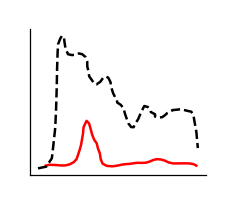

In [59]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def plot_minimal_kanizsa(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)

    # Extract and sort
    line_data = sorted(next(d for d in data['datasetColl'] if d['name'] == 'line')['data'], key=lambda p: p['value'][0])
    illusory_data = sorted(next(d for d in data['datasetColl'] if d['name'] == 'illusory contour')['data'], key=lambda p: p['value'][0])

    # Convert to arrays
    line_x = np.array([p['value'][0] for p in line_data])
    line_y = np.array([p['value'][1] for p in line_data])
    illusory_x = np.array([p['value'][0] for p in illusory_data])
    illusory_y = np.array([p['value'][1] for p in illusory_data])

    # Apply Savitzky-Golay smoothing (window size must be odd and < data length)
    window = 11 if len(line_y) > 11 else len(line_y) - (1 - len(line_y) % 2)
    line_y_smooth = savgol_filter(line_y, window_length=window, polyorder=3)
    illusory_y_smooth = savgol_filter(illusory_y, window_length=window, polyorder=4)

    # Plotting
    fig, ax = plt.subplots(figsize=(0.6, 0.5), dpi=300)

    ax.plot(illusory_x, illusory_y_smooth, color='red', linewidth=0.6, label='Effect')          # Illusory = Effect
    ax.plot(line_x, line_y_smooth, color='black', linestyle='--', linewidth=0.6, label='Control') # Line = Control

    # Minimal axis styling
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(length=1, width=0.2, pad=1)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 0))
    ax.spines['bottom'].set_position(('outward', 0))
    ax.spines['left'].set_linewidth(0.3)
    ax.spines['bottom'].set_linewidth(0.3)

    # ax.legend(fontsize=2.5, frameon=False, handlelength=1, loc='upper right')

    plt.tight_layout(pad=0.05)
    plt.savefig('kanizsa_minimal.pdf', dpi=300)
    plt.show()

# Run it
plot_minimal_kanizsa("Kanizsa.json")

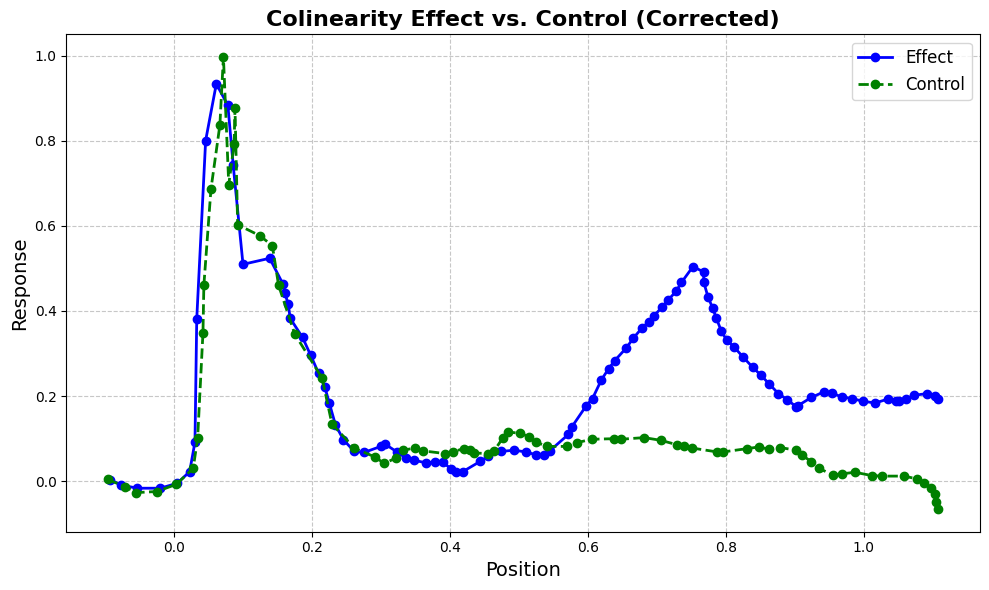

In [9]:
import json
import matplotlib.pyplot as plt

def plot_colinearity(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)

    # Extract datasets
    effect_data = next(d for d in data['datasetColl'] if d['name'] == 'Effect')['data']
    control_data = next(d for d in data['datasetColl'] if d['name'] == 'Control')['data']

    # Sort data points by x-axis
    effect_data_sorted = sorted(effect_data, key=lambda p: p['value'][0])
    control_data_sorted = sorted(control_data, key=lambda p: p['value'][0])

    # Invert the y-axis values
    effect_x = [point['value'][0] for point in effect_data_sorted]
    effect_y = [1 - point['value'][1] for point in effect_data_sorted]  # Corrected here
    control_x = [point['value'][0] for point in control_data_sorted]
    control_y = [1 - point['value'][1] for point in control_data_sorted]  # Corrected here

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(effect_x, effect_y, label='Effect', color='blue', marker='o', linewidth=2, markersize=6)
    plt.plot(control_x, control_y, label='Control', color='green', linestyle='--', marker='o', linewidth=2, markersize=6)

    plt.xlabel('Position', fontsize=14)
    plt.ylabel('Response', fontsize=14)
    plt.title('Colinearity Effect vs. Control (Corrected)', fontsize=16, fontweight='bold')

    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


json_path = 'Gestalt_continuation.json'
plot_colinearity(json_path)


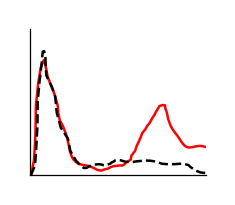

In [48]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter


def plot_minimal_colinearity(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)

    # Extract and sort data
    effect_data = sorted(next(d for d in data['datasetColl'] if d['name'] == 'Effect')['data'], key=lambda p: p['value'][0])
    control_data = sorted(next(d for d in data['datasetColl'] if d['name'] == 'Control')['data'], key=lambda p: p['value'][0])

    # Invert y-axis and extract
    effect_x = np.array([p['value'][0] for p in effect_data])
    effect_y = np.array([1 - p['value'][1] for p in effect_data])
    control_x = np.array([p['value'][0] for p in control_data])
    control_y = np.array([1 - p['value'][1] for p in control_data])

    # Smooth curves
    def smooth(x, y, points=300):
        # Remove duplicate x-values
        x_unique, idx = np.unique(x, return_index=True)
        y_unique = y[idx]

        spline = make_interp_spline(x_unique, y_unique, k=2)  # quadratic (less wiggly)
        x_new = np.linspace(x_unique.min(), x_unique.max(), points)
        y_new = spline(x_new)
        return x_new, y_new

    # Smooth y only (leave x as is)
    effect_y_smooth = savgol_filter(effect_y, window_length=11, polyorder=3)
    control_y_smooth = savgol_filter(control_y, window_length=11, polyorder=3)

    
    
    effect_x_s, effect_y_s = smooth(effect_x, effect_y)
    control_x_s, control_y_s = smooth(control_x, control_y)

    # Plotting
    fig, ax = plt.subplots(figsize=(0.6, 0.5), dpi=300)

    # Plot original x with smoothed y
    ax.plot(effect_x, effect_y_smooth, color='red', linewidth=0.6, label='Effect')
    ax.plot(control_x, control_y_smooth, color='black', linestyle='--', linewidth=0.6, label='Control')
    # Hide tick labels and shrink axes
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(length=1, width=0.2, pad=1)

    # Floating axes (not connected at 0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_linewidth(0.3)
    ax.spines['bottom'].set_linewidth(0.3)

    # Legend
    # ax.legend(fontsize=2.5, frameon=False, handlelength=1, loc='upper right')

    plt.tight_layout(pad=0.05)
    plt.savefig('colinearity_minimal.pdf', dpi=300)
    plt.show()

# Run it
plot_minimal_colinearity("Gestalt_continuation.json")

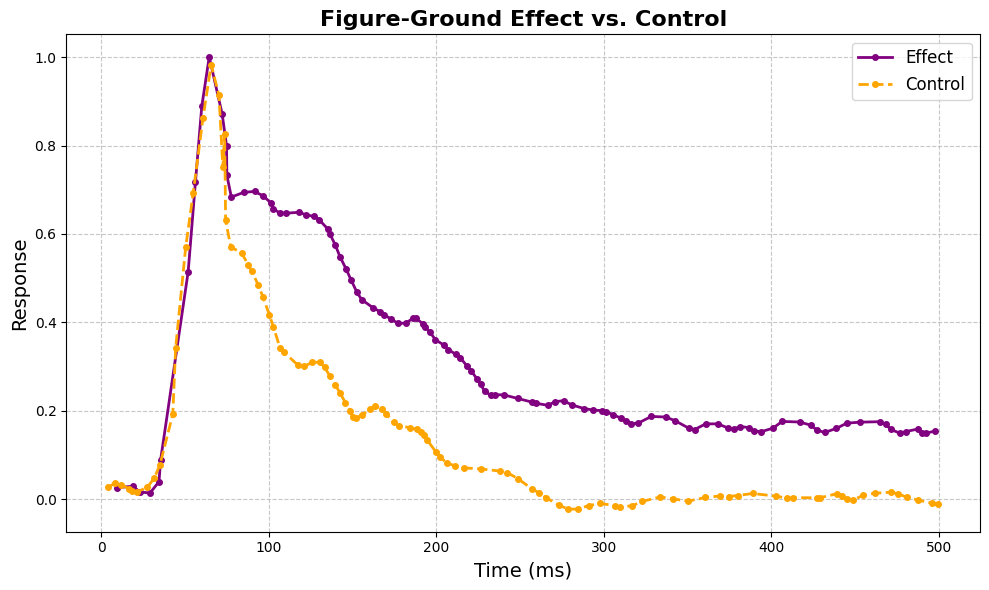

In [15]:
import json
import matplotlib.pyplot as plt

def plot_figureground(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)

    # Extract datasets
    effect_data = next(d for d in data['datasetColl'] if d['name'] == 'Effect')['data']
    control_data = next(d for d in data['datasetColl'] if d['name'] == 'Control')['data']

    # Sort data points by x-axis (time)
    effect_data_sorted = sorted(effect_data, key=lambda p: p['value'][0])
    control_data_sorted = sorted(control_data, key=lambda p: p['value'][0])

    # Prepare data points for plotting
    effect_x = [point['value'][0] for point in effect_data_sorted]
    effect_y = [point['value'][1] for point in effect_data_sorted]
    control_x = [point['value'][0] for point in control_data_sorted]
    control_y = [point['value'][1] for point in control_data_sorted]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(effect_x, effect_y, label='Effect', color='purple', marker='o', linewidth=2, markersize=4)
    plt.plot(control_x, control_y, label='Control', color='orange', linestyle='--', marker='o', linewidth=2, markersize=4)

    plt.xlabel('Time (ms)', fontsize=14)
    plt.ylabel('Response', fontsize=14)
    plt.title('Figure-Ground Effect vs. Control', fontsize=16, fontweight='bold')

    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


json_path = 'figureground_corrected.json'
plot_figureground(json_path)

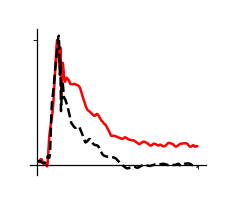

In [37]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def plot_minimal_figureground(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)

    effect_data = next(d for d in data['datasetColl'] if d['name'] == 'Effect')['data']
    control_data = next(d for d in data['datasetColl'] if d['name'] == 'Control')['data']

    # Sort by x
    effect_data_sorted = sorted(effect_data, key=lambda p: p['value'][0])
    control_data_sorted = sorted(control_data, key=lambda p: p['value'][0])

    # Extract arrays
    effect_x = np.array([p['value'][0] for p in effect_data_sorted])
    effect_y = np.array([p['value'][1] for p in effect_data_sorted])
    control_x = np.array([p['value'][0] for p in control_data_sorted])
    control_y = np.array([p['value'][1] for p in control_data_sorted])

    # Smoothing
    def smooth(x, y, points=300):
        spline = make_interp_spline(x, y, k=3)
        x_new = np.linspace(x.min(), x.max(), points)
        y_new = spline(x_new)
        return x_new, y_new

    effect_x_s, effect_y_s = smooth(effect_x, effect_y)
    control_x_s, control_y_s = smooth(control_x, control_y)

    # Plotting
    fig, ax = plt.subplots(figsize=(0.6, 0.5), dpi=300)

    ax.plot(effect_x_s, effect_y_s, color='red', linewidth=0.6, label='Effect')
    ax.plot(control_x_s, control_y_s, color='black', linewidth=0.6, linestyle='--', label='Control')

    # Hide tick labels and minimize tick size
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(length=1, width=0.2)

    # Minimal spines (no box)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_linewidth(0.3)
    ax.spines['bottom'].set_linewidth(0.3)

    # Legend
    # ax.legend(fontsize=2.5, frameon=False, loc='upper right', handlelength=1)

    plt.tight_layout(pad=0.05)
    plt.savefig('figureground_minimal.pdf', dpi=300)
    plt.show()

# Run it
plot_minimal_figureground("figureground_corrected.json")